In [6]:
import modules.pdfutil as pdfutil
import yaml

page    = pdfutil.page_from_file('../data/Saga/Unit_1_Mixed_Review.pdf', 2)
strings = pdfutil.strings_from_page(page)
print(yaml.dump(strings[0:30] + ['--snip--']))


- 'SAT '
- 'Unit '
- '1 '
- Assessment
- 'Student Version '
- 'Page '
- '3'
- 'of '
- '4'
- "\xA9 2019 Saga Education"
- SAT1.4 Model Equations and Word Problem Strategies
- '9.'
- (calculator)
- 'The cost of using a telephone in a hotel '
- 'meeting room is $0.20 per minute. Which of '
- 'the following equations represents the total '
- 'cost, '
- c
- ', in dollars, for '
- h
- ', '
- hours
- of phone use?
- 'A) '
- c = 0.20(60h)
- B) c = 0.20h + 60
- 'C) '
- 'D) c = '
- '10. '
- (non
- --snip--



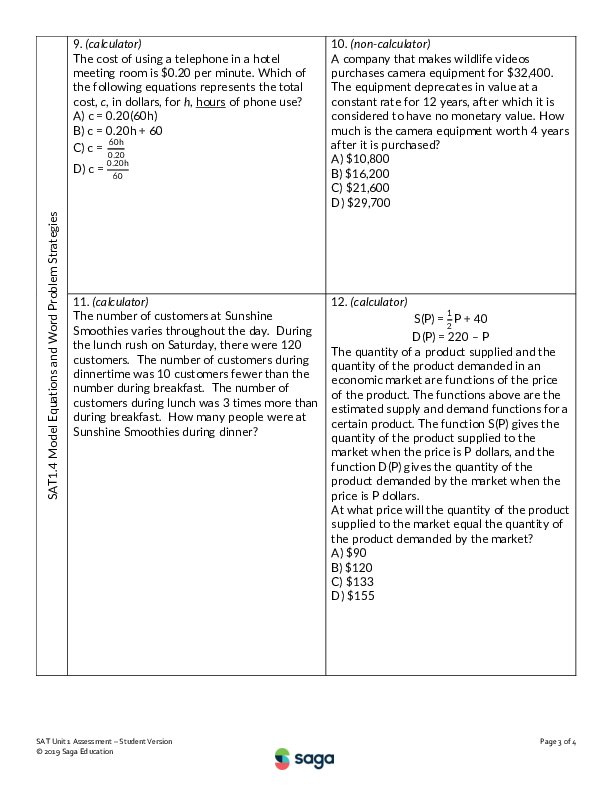

In [2]:
img = pdfutil.image_from_page(page)
img

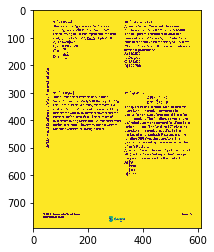

In [5]:
raw = pdfutil.nparray_from_image(img)
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()
None

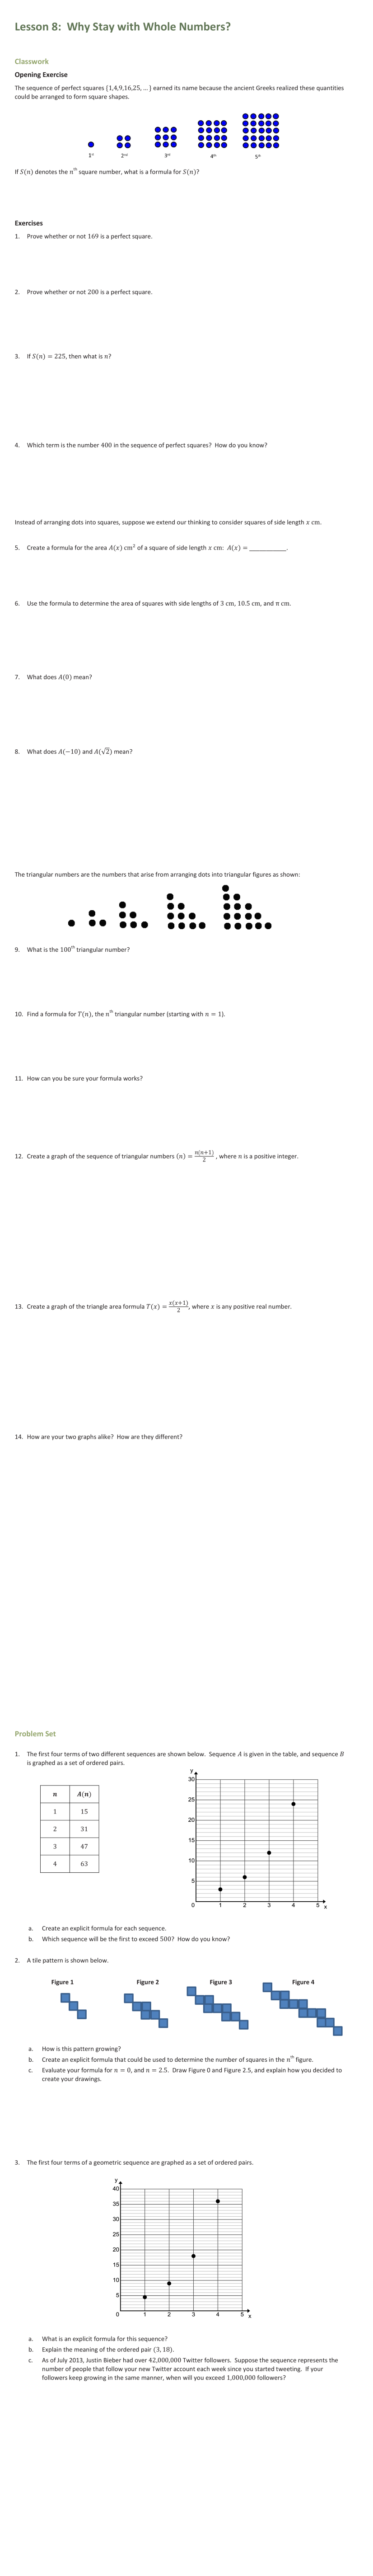

In [3]:
from wand.image import Image

img = Image(filename='../data/EngageNY/Algebra1-m03-b-l08.png')
img

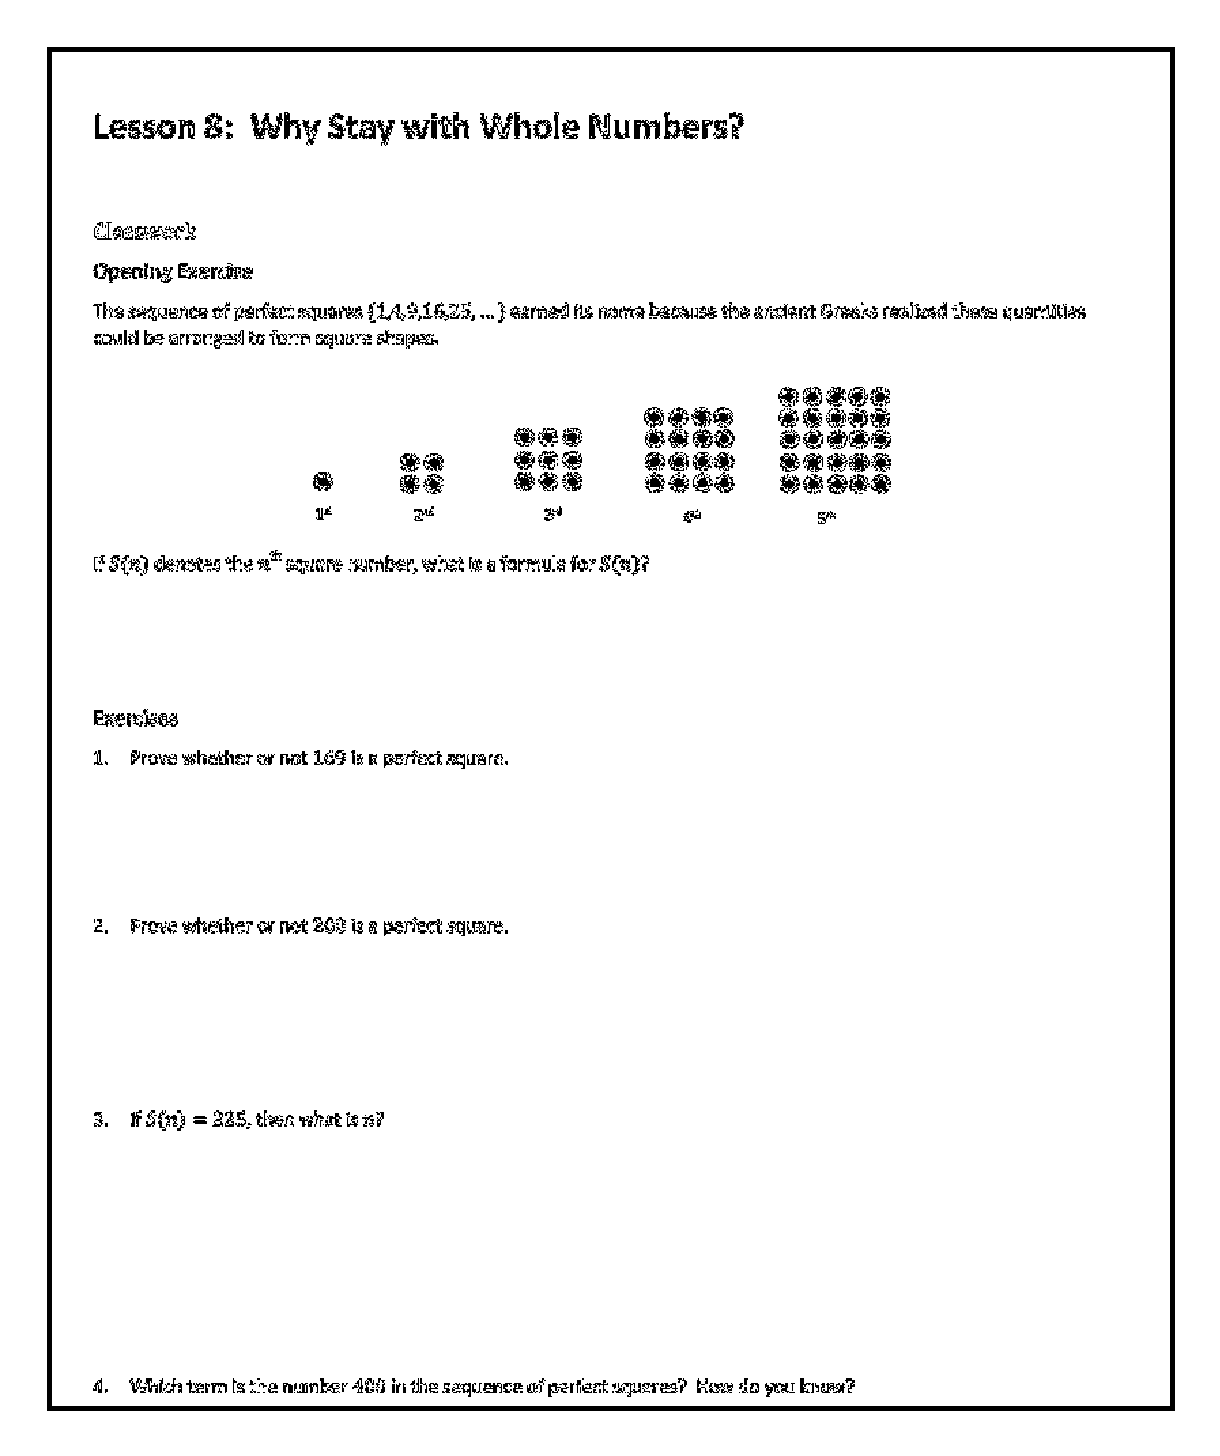

In [94]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 450;

raw = pdfutil.nparray_from_image(img);
gray = np.uint8(cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY));

# plt.imshow(gray, cmap='gray');
thresh = cv2.adaptiveThreshold(gray, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10);
plt.imshow(thresh[1:1000,:], cmap='gray' , interpolation='none');
plt.xticks([]);
plt.yticks([]);
plt.show();

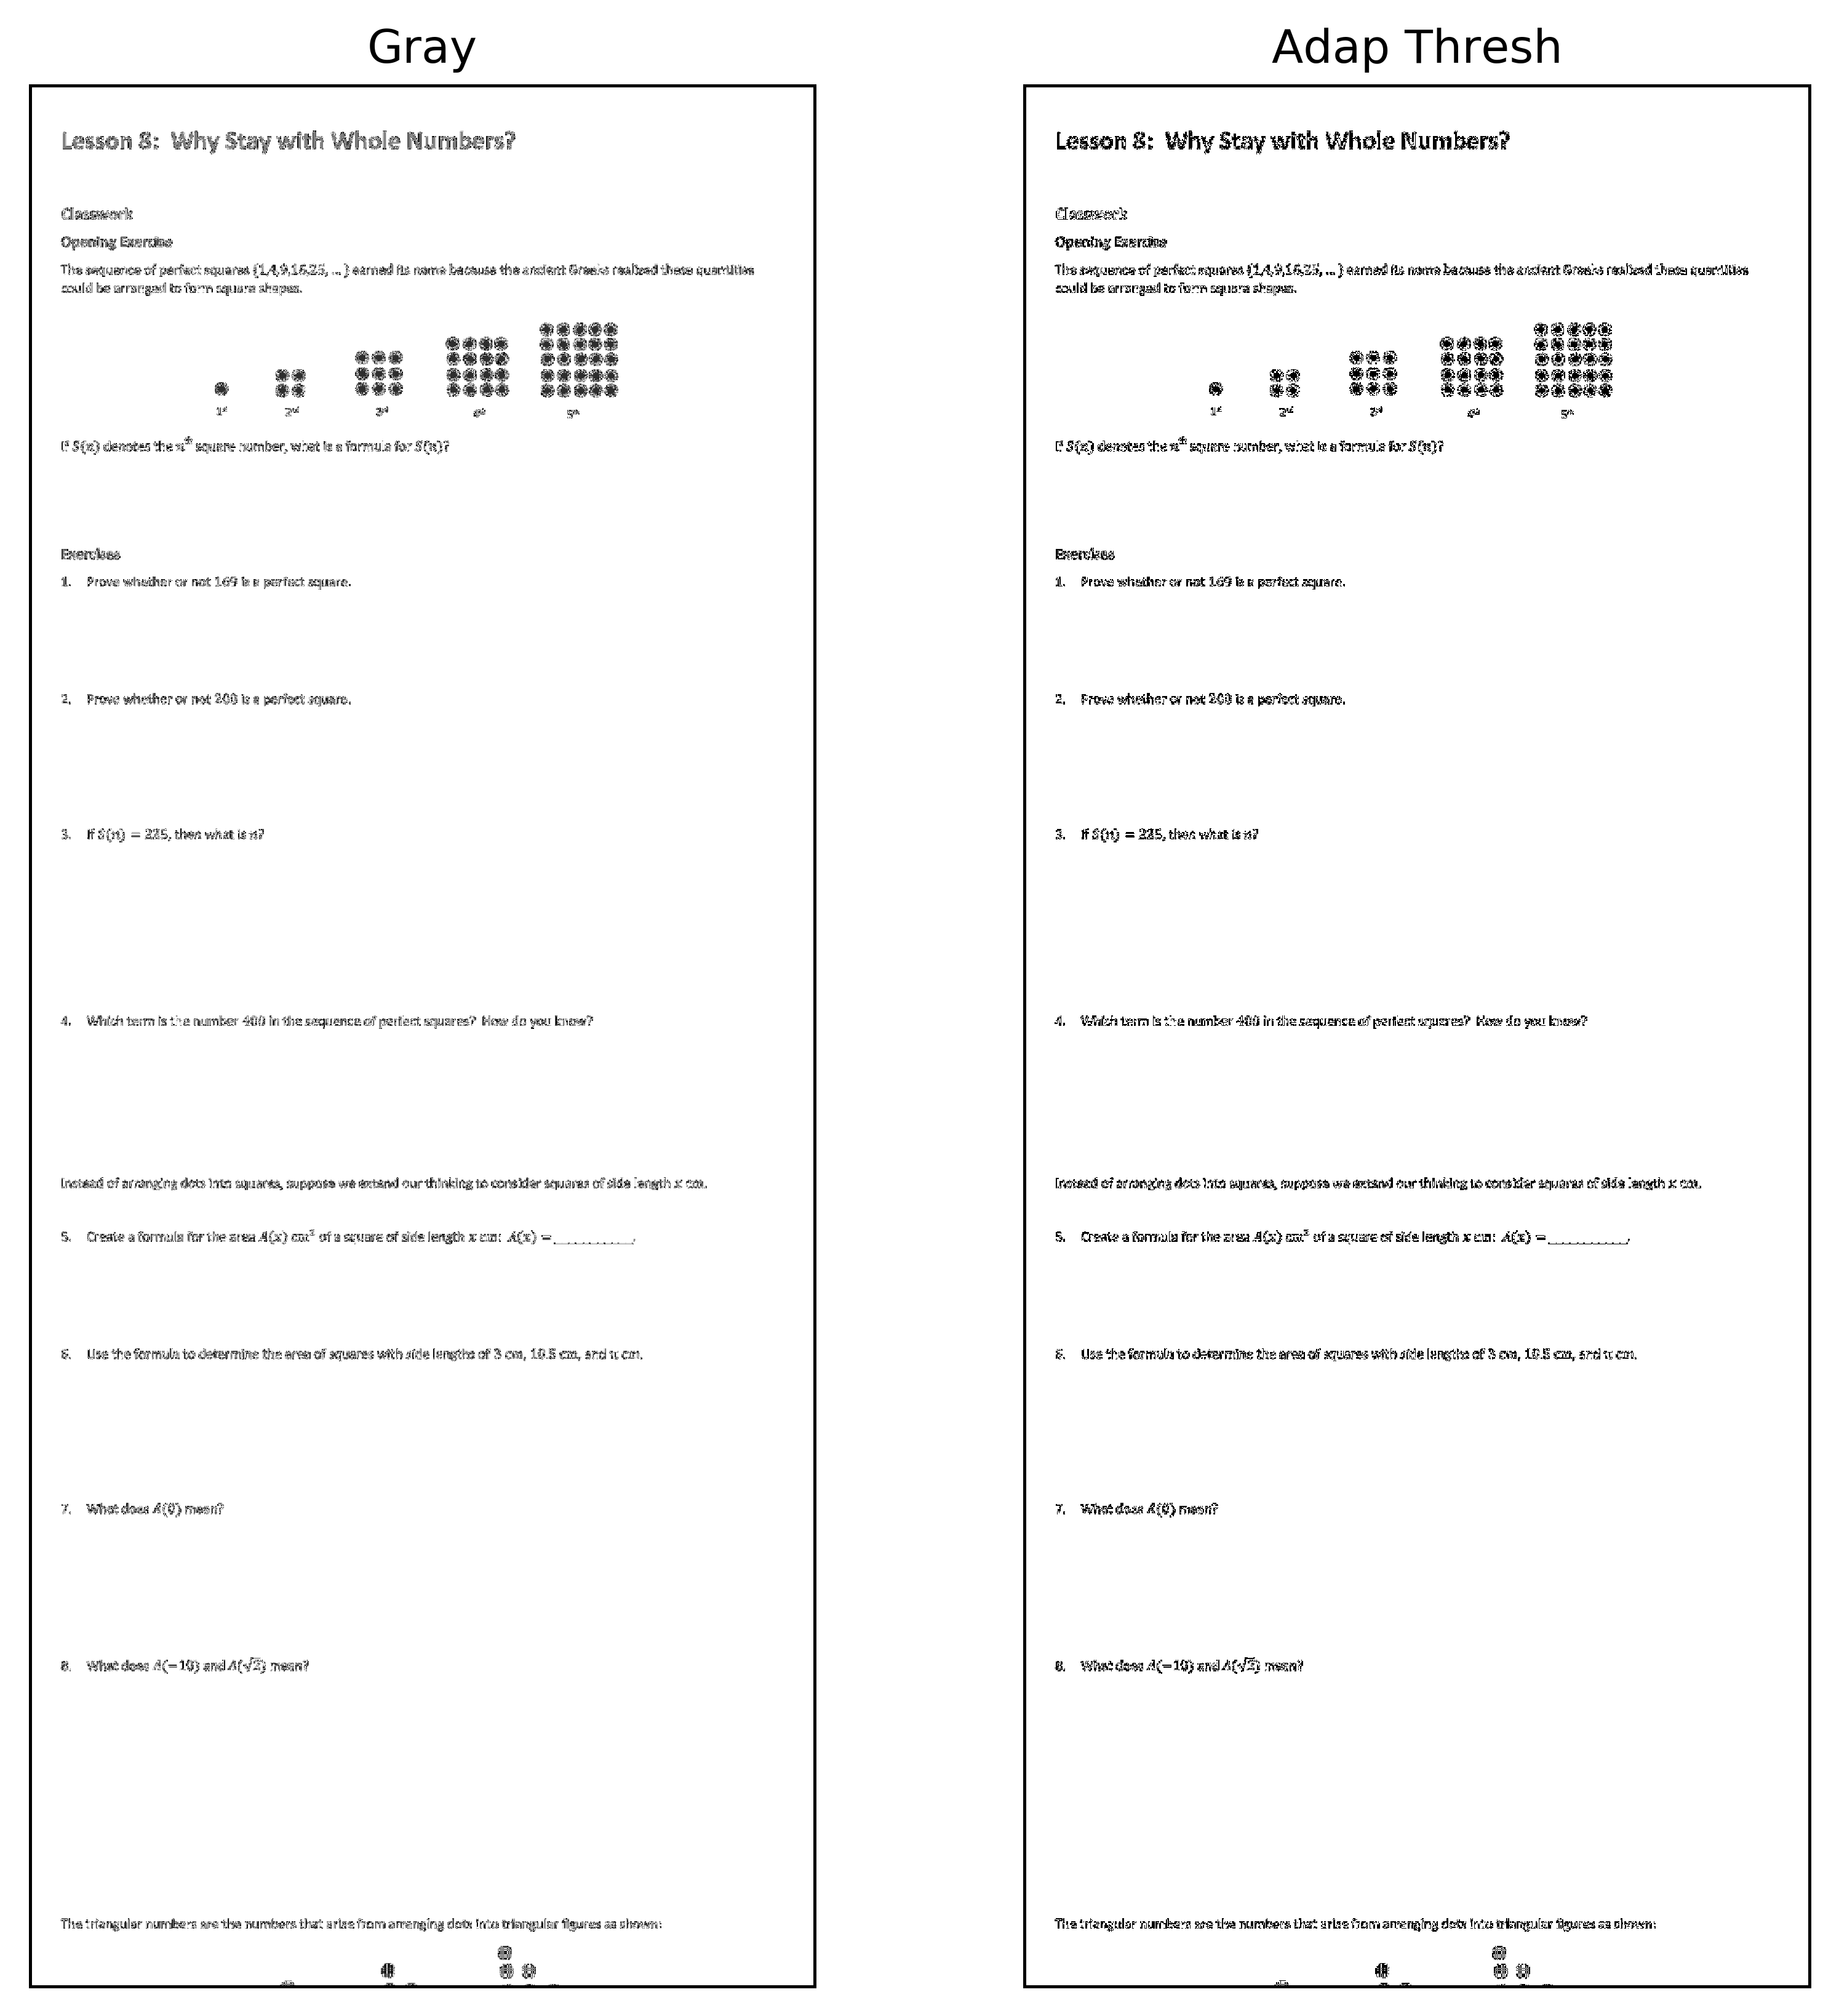

In [173]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize = (8.5,20)); 
ax1 = fig1.add_subplot(2,2,1) ;
ax2 = fig1.add_subplot(2,2,2);

ax1.imshow(gray[0:2000,:], cmap='gray');
ax1.set_title('Gray');
ax1.set_xticks([]);
ax1.set_yticks([]);

ax2.imshow(thresh[0:2000,:], cmap='gray', interpolation='none');
ax2.set_title('Adap Thresh');
ax2.set_xticks([]);
ax2.set_yticks([]);


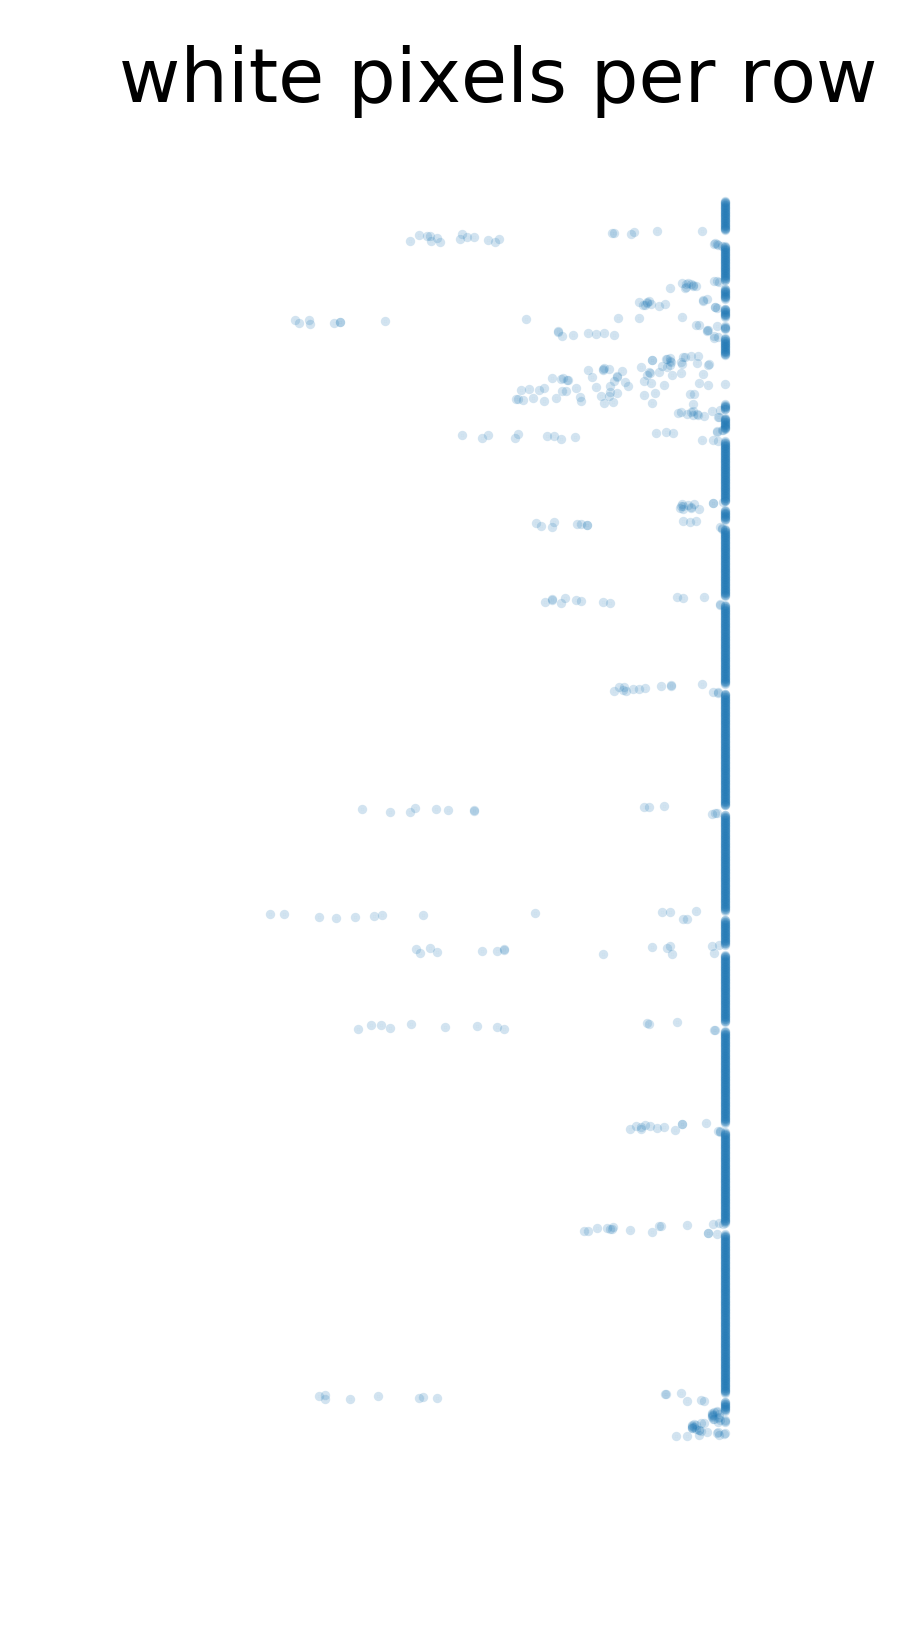

In [114]:
#count the number of (thresholded-to) white pixels in each row
row_counts = cv2.reduce(thresh, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten();
#plot the white pixel counts for the first 2000 rows
plt.scatter(row_counts[0:2000], range(0,2000), marker='.', alpha=0.2, s=1);
plt.gca().set_aspect(0.5);
plt.gca().invert_yaxis();
plt.gca().axis('off');
plt.title('white pixels per row');
plt.show;

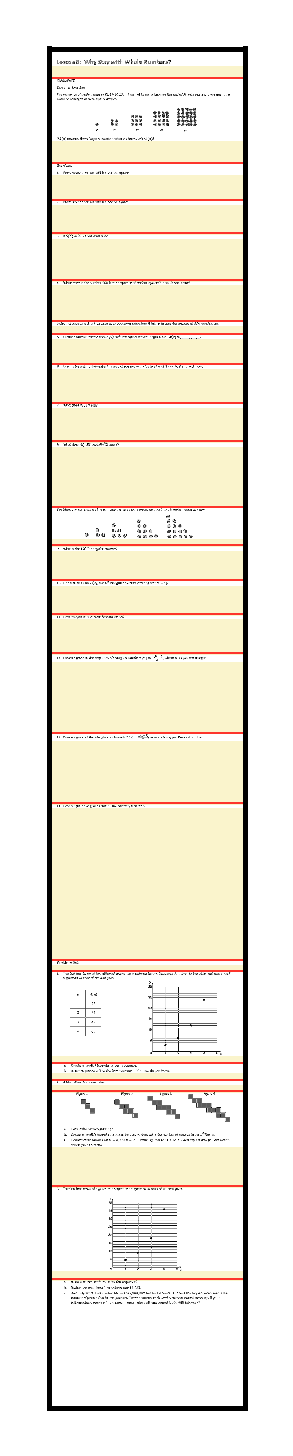

In [172]:
from itertools import groupby
from statistics import median
import matplotlib.patches as patches

height,width = gray.shape

white_rows = np.where(row_counts==max(row_counts), 1, 0)

white_blocks = []
pos = 0
for k,g in groupby(white_rows):
   start = pos
   end = pos + len(list(g))
   is_margin = start==0 or end==height
   if k==1 and not is_margin: 
       white_blocks.append([start,end-1])
   pos = end

median_size = median([b[1]-b[0] for b in white_blocks])
big_blocks = [b for b in white_blocks if (b[1]-b[0]>=median_size)] 
breaks = [b[1] - (median_size//5)  for b in big_blocks]

plt.imshow(gray[:,:], cmap='gray');
plt.xticks([]);
plt.yticks([]);

ax = plt.gca();

for b in big_blocks:
    rect = patches.Rectangle((0,b[0]),width, b[1]-b[0],linewidth=1,edgecolor='none',facecolor=(0.9,0.8,0.0,0.2)) ;
    ax.add_patch(rect) ;

for b in breaks:
    rect = patches.Rectangle((0,b),width, 0,linewidth=0.25,edgecolor='r',facecolor='none') ;
    ax.add_patch(rect) ;

plt.show();



